In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [210]:
seed_df = pd.read_excel('seed dataset.xlsx')
seed_df.head(10)

,Area,Perimeter,MajorAxisLength,DFactor1,DFactor2,DFactor3,DFactor4,DFactor5,DFactor6,DFactor7,DFactor8,DFactor9,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SE
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SE
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SE
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SE
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SE
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SE
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SE
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SE
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SE
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SE


In [211]:
# We don't have any null values
seed_df.info()
print(seed_df.isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   DFactor1         13611 non-null  float64
 4   DFactor2         13611 non-null  float64
 5   DFactor3         13611 non-null  float64
 6   DFactor4         13611 non-null  int64  
 7   DFactor5         13611 non-null  float64
 8   DFactor6         13611 non-null  float64
 9   DFactor7         13611 non-null  float64
 10  DFactor8         13611 non-null  float64
 11  DFactor9         13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [212]:
seed_df.describe()

,Area,Perimeter,MajorAxisLength,DFactor1,DFactor2,DFactor3,DFactor4,DFactor5,DFactor6,DFactor7,DFactor8,DFactor9,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


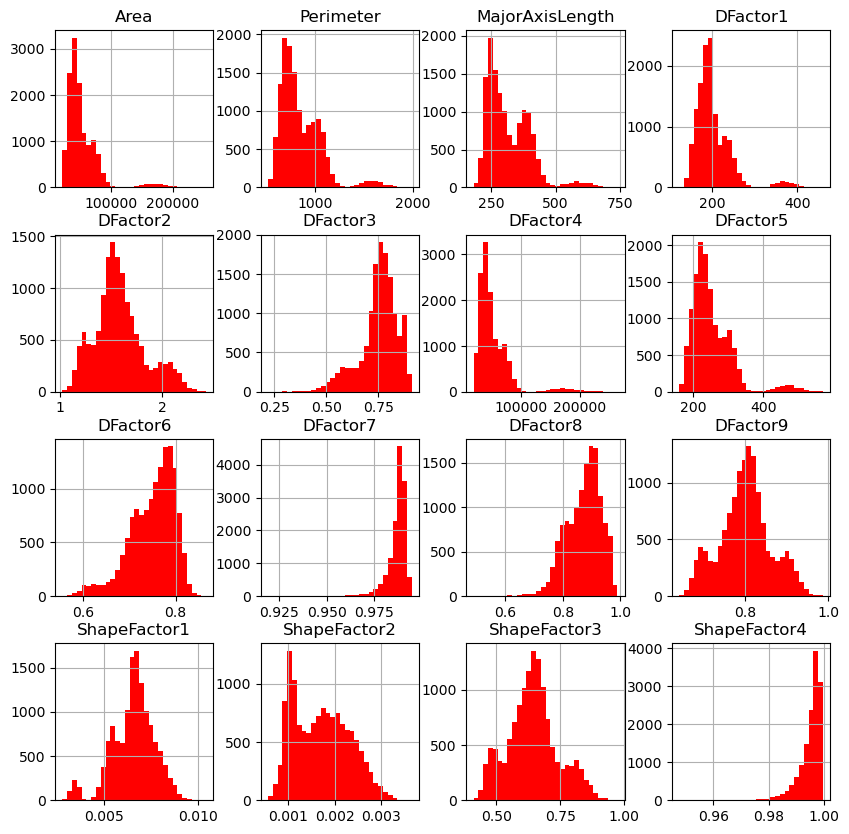

In [213]:
seed_df.hist(bins=30, figsize=(10,10),color='r')
plt.show()

In [214]:
target_df = seed_df[['Class']]
target_df

,Class
0,SE
1,SE
2,SE
3,SE
4,SE
...,...
13606,DE
13607,DE
13608,DE
13609,DE


In [215]:
seed_df = seed_df.drop(columns=['Class'])
seed_df

,Area,Perimeter,MajorAxisLength,DFactor1,DFactor2,DFactor3,DFactor4,DFactor5,DFactor6,DFactor7,DFactor8,DFactor9,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [216]:
# finding the outliers

from scipy.stats import zscore
z_score = zscore(seed_df)
outliers = (z_score>3) | (z_score<-3)
outliers.sum()

Area               483
Perimeter          404
MajorAxisLength    316
DFactor1           508
DFactor2            15
DFactor3           125
DFactor4           483
DFactor5           465
DFactor6           135
DFactor7           238
DFactor8            74
DFactor9             1
ShapeFactor1        59
ShapeFactor2         5
ShapeFactor3         8
ShapeFactor4       242
dtype: int64

In [217]:
# removing outliers from data and normalizing data
z_score_df = pd.DataFrame(z_score)
z_score_df = pd.concat([z_score_df, target_df], axis=1)
z_score_df



,Area,Perimeter,MajorAxisLength,DFactor1,DFactor2,DFactor3,DFactor4,DFactor5,DFactor6,DFactor7,DFactor8,DFactor9,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371,SE
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138,SE
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755,SE
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985,SE
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.373471,-0.446083,-0.366669,-0.363055,-0.123703,0.153343,-0.378191,-0.364148,-0.716284,0.684173,0.727872,0.032433,0.261425,0.055630,-0.006086,0.760813,DE
13607,-0.373334,-0.456336,-0.450053,-0.257015,-0.432979,-0.165141,-0.378662,-0.363962,1.022933,0.774384,0.818807,0.362794,0.110384,0.285117,0.328393,0.722659,DE
13608,-0.372038,-0.447833,-0.450478,-0.246456,-0.448618,-0.182940,-0.376143,-0.362197,-0.403392,0.591370,0.758468,0.370533,0.104269,0.289204,0.336328,0.390251,DE
13609,-0.371765,-0.427029,-0.428974,-0.266742,-0.380735,-0.106960,-0.372851,-0.361825,-0.903414,0.143717,0.581753,0.285098,0.141906,0.228375,0.248973,0.036440,DE


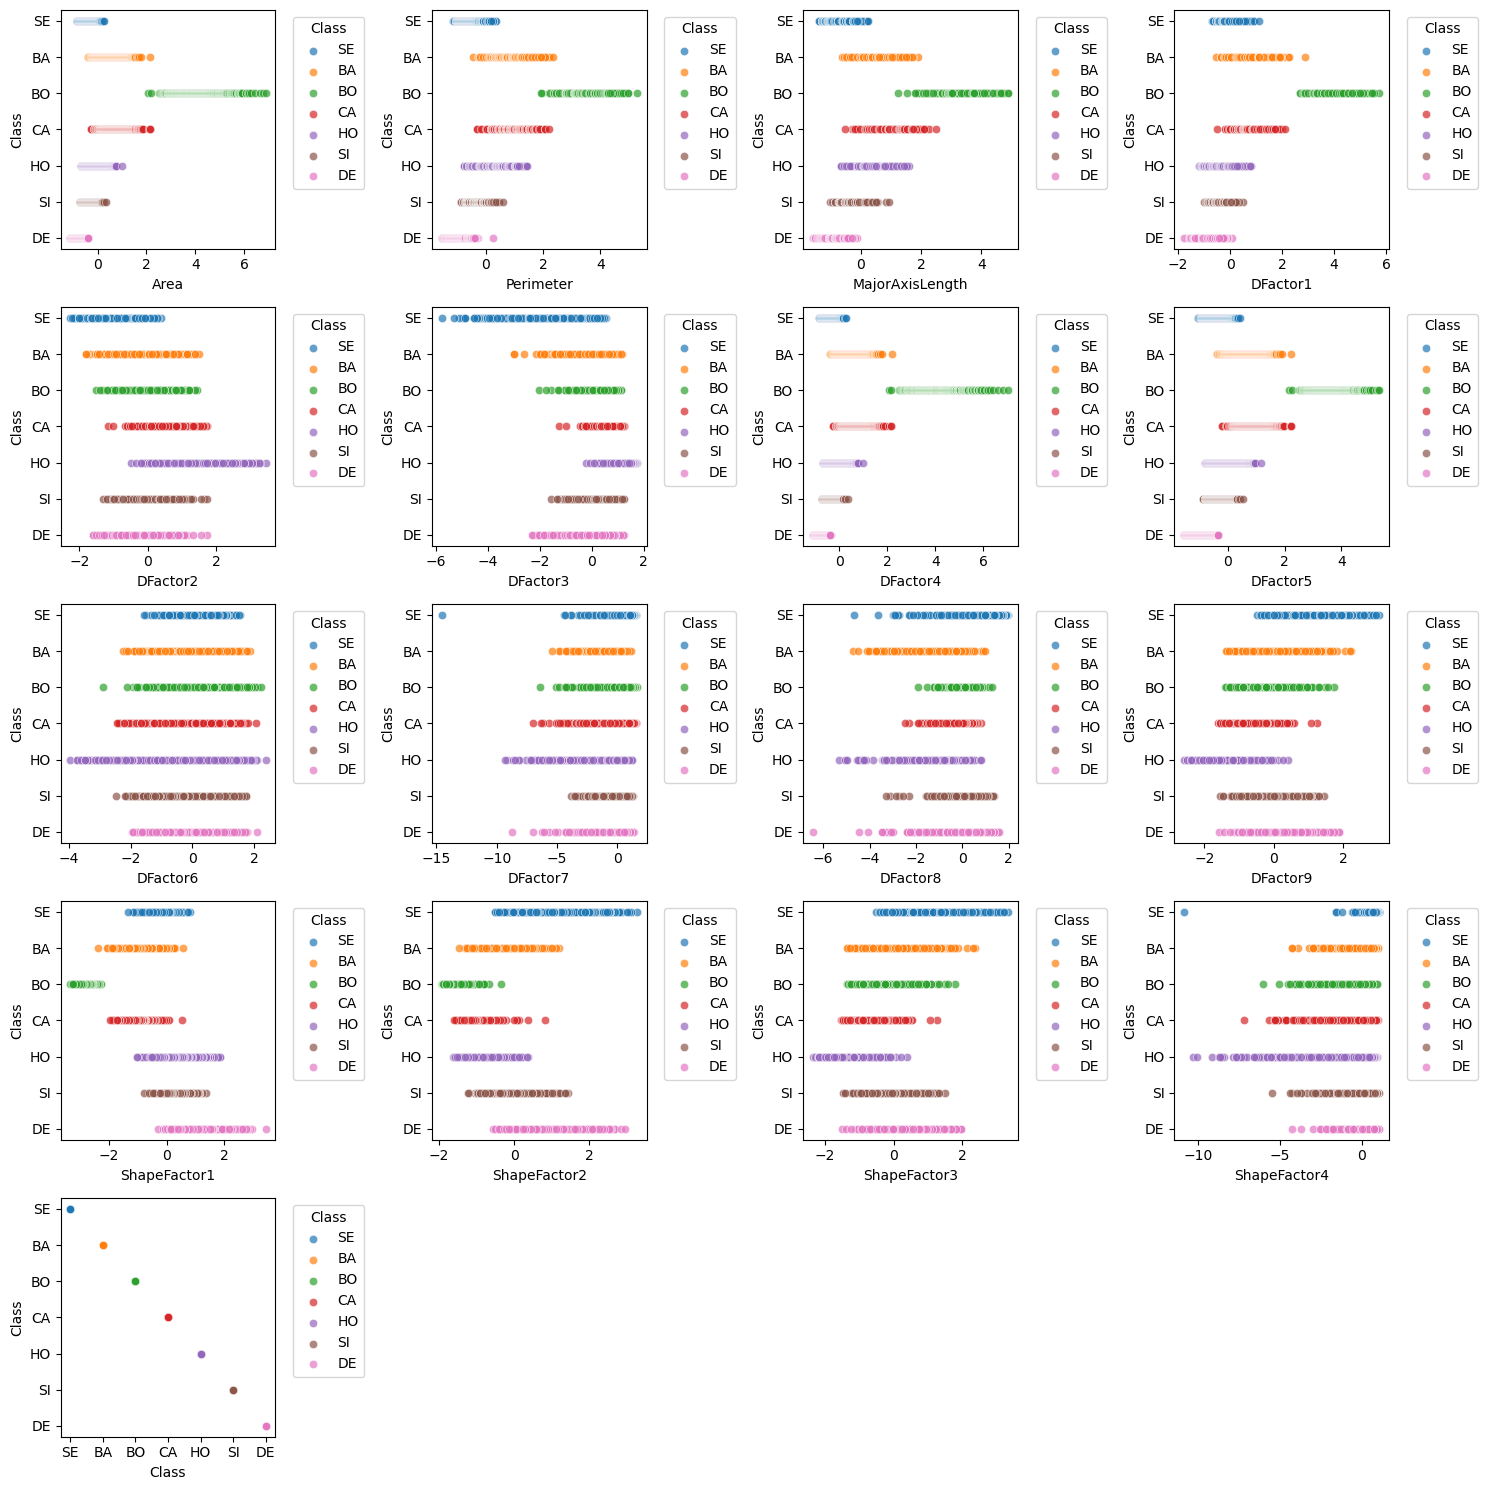

In [218]:
num_cols = len(z_score_df.columns)
num_rows = (num_cols + 3) // 4 

plt.figure(figsize=(15, 15))

for idx, column in enumerate(z_score_df.columns):
    plt.subplot(num_rows, 4, idx + 1)  # Use num_rows instead of a fixed number of rows
    for class_label in z_score_df['Class'].unique():  # Assuming 'Class' is a regular feature column in ndf
        subset_data = z_score_df[z_score_df['Class'] == class_label]
        sns.scatterplot(data=subset_data, x=column, y='Class', label=class_label, alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Class')
    plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left') 

plt.tight_layout()
plt.show()

In [219]:
seed_df = z_score_df[(z_score_df.iloc[:, :-1].abs() <= 3).all(axis=1)]
seed_df

,Area,Perimeter,MajorAxisLength,DFactor1,DFactor2,DFactor3,DFactor4,DFactor5,DFactor6,DFactor7,DFactor8,DFactor9,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371,SE
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755,SE
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985,SE
5,-0.776499,-1.028349,-1.255456,-0.461669,-1.670962,-2.505417,-0.778140,-0.958455,0.528796,0.507909,1.185697,2.007128,0.404676,2.411386,2.118134,0.955608,SE
6,-0.769746,-0.864518,-1.273082,-0.405432,-1.769468,-2.841539,-0.765713,-0.947624,0.258100,-0.656939,-0.339428,2.163463,0.320306,2.561150,2.299123,0.912770,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.373471,-0.446083,-0.366669,-0.363055,-0.123703,0.153343,-0.378191,-0.364148,-0.716284,0.684173,0.727872,0.032433,0.261425,0.055630,-0.006086,0.760813,DE
13607,-0.373334,-0.456336,-0.450053,-0.257015,-0.432979,-0.165141,-0.378662,-0.363962,1.022933,0.774384,0.818807,0.362794,0.110384,0.285117,0.328393,0.722659,DE
13608,-0.372038,-0.447833,-0.450478,-0.246456,-0.448618,-0.182940,-0.376143,-0.362197,-0.403392,0.591370,0.758468,0.370533,0.104269,0.289204,0.336328,0.390251,DE
13609,-0.371765,-0.427029,-0.428974,-0.266742,-0.380735,-0.106960,-0.372851,-0.361825,-0.903414,0.143717,0.581753,0.285098,0.141906,0.228375,0.248973,0.036440,DE


In [220]:
target_df = seed_df[['Class']]
seed_df = seed_df.drop(columns=['Class'])

In [221]:
target_df

,Class
0,SE
2,SE
3,SE
5,SE
6,SE
...,...
13606,DE
13607,DE
13608,DE
13609,DE


In [222]:
target_df.value_counts()

Class
DE       3520
SI       2623
SE       1897
HO       1632
CA       1544
BA       1261
BO         10
Name: count, dtype: int64

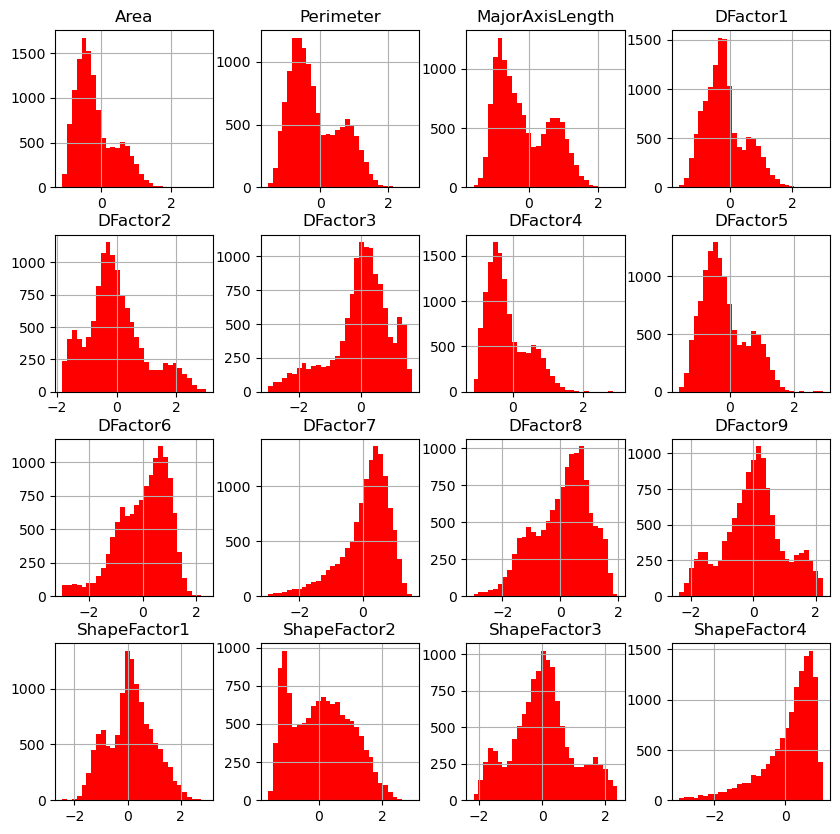

In [223]:
seed_df.hist(bins=30, figsize=(10,10),color='r')
plt.show()

First Model - Logistic Regression

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(seed_df, target_df, test_size=0.2, random_state=42)


logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)


y_hat = logistic_regression_model.predict(X_test)



c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [225]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat,average='macro')
recall = recall_score(y_test, y_hat,average='macro')
f1 = f1_score(y_test, y_hat,average='macro')
confusion = confusion_matrix(y_test, y_hat)

print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

Model Performance Metrics:
Accuracy: 0.92
Precision: 0.94
Recall: 0.93
F1 Score: 0.94
Confusion Matrix:
[[243   0  16   0   1   1   6]
 [  0   2   0   0   0   0   0]
 [ 10   0 308   0   1   1   1]
 [  0   0   0 608   1   9  51]
 [  1   0   5   4 301   0  10]
 [  2   0   0   7   0 364  13]
 [  0   0   1  49   6   6 470]]


Second Model - K nearest neighbours

In [226]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


X2_train, X2_test, y2_train, y2_test = train_test_split(seed_df, target_df, test_size=0.2, random_state=42)




In [227]:
# I was getting the error: 'Flags' object has no attribute 'c_contiguous'
X2_train = np.ascontiguousarray(X2_train)
X2_test = np.ascontiguousarray(X2_test)


In [228]:
knn_classifier = KNeighborsClassifier(n_neighbors=5) 
knn_classifier.fit(X2_train, y2_train)


y2_hat = knn_classifier.predict(X2_test)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [229]:
# Evaluate the model's performance
accuracy = accuracy_score(y2_test, y2_hat)
precision = precision_score(y2_test, y2_hat, average='macro')  
recall = recall_score(y_test, y2_hat, average='macro')  
f1 = f1_score(y_test, y2_hat, average='macro')  
confusion = confusion_matrix(y2_test, y2_hat)

print("K-NN Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

K-NN Model Performance Metrics:
Accuracy: 0.92
Precision: 0.94
Recall: 0.93
F1 Score: 0.93
Confusion Matrix:
[[240   0  19   0   2   1   5]
 [  0   2   0   0   0   0   0]
 [  8   0 310   0   0   1   2]
 [  0   0   0 609   3  15  42]
 [  0   0   8   3 298   0  12]
 [  1   0   0  13   0 363   9]
 [  1   0   3  52   4   5 467]]


In [230]:
# Performing cross validation 

from sklearn.model_selection import cross_val_score
import numpy as np


k_values = np.arange(1, 21) 


mean_scores = []


for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X2_train, y2_train, cv=5, scoring='accuracy') 
    mean_scores.append(scores.mean())


best_k = k_values[np.argmax(mean_scores)]




c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [231]:
print("Best k:", best_k)

Best k: 15


In [232]:
# train with k=15
knn_classifier = KNeighborsClassifier(n_neighbors=15) 
knn_classifier.fit(X2_train, y2_train)


y2_hat = knn_classifier.predict(X2_test)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [233]:
# Evaluate the model's performance
accuracy = accuracy_score(y2_test, y2_hat)
precision = precision_score(y2_test, y2_hat, average='macro')  
recall = recall_score(y_test, y2_hat, average='macro')  
f1 = f1_score(y_test, y2_hat, average='macro')  
confusion = confusion_matrix(y2_test, y2_hat)

print("K-NN Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

K-NN Model Performance Metrics:
Accuracy: 0.92
Precision: 0.94
Recall: 0.93
F1 Score: 0.94
Confusion Matrix:
[[241   0  20   0   2   1   3]
 [  0   2   0   0   0   0   0]
 [  5   0 312   0   1   1   2]
 [  0   0   0 611   1  11  46]
 [  1   0   5   4 298   0  13]
 [  1   0   0  10   0 364  11]
 [  1   0   2  55   4   5 465]]


Third Model - Decision Tree

In [234]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X3_train, X3_test, y3_train, y3_test = train_test_split(seed_df, target_df, test_size=0.2, random_state=42)


decision_tree_classifier = DecisionTreeClassifier(random_state=42) 
decision_tree_classifier.fit(X3_train, y3_train)


y3_hat = decision_tree_classifier.predict(X3_test)

In [235]:
# Evaluate the model's performance
accuracy = accuracy_score(y3_test, y3_hat)
precision = precision_score(y3_test, y3_hat, average='macro') 
recall = recall_score(y3_test, y3_hat, average='macro')  
f1 = f1_score(y3_test, y3_hat, average='macro')  
confusion = confusion_matrix(y3_test, y3_hat)

print("Decision Tree Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

Decision Tree Model Performance Metrics:
Accuracy: 0.89
Precision: 0.77
Recall: 0.77
F1 Score: 0.77
Confusion Matrix:
[[239   0  14   1   3   3   7]
 [  0   0   2   0   0   0   0]
 [ 17   0 297   0   2   1   4]
 [  1   0   0 593   5  14  56]
 [  1   0  11   4 293   0  12]
 [  0   0   1  15   0 358  12]
 [  5   0   1  56  12  14 444]]


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [236]:
# hyperparameter tuning

from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [3, 5, 7, 9, None],  
}


decision_tree_classifier = DecisionTreeClassifier(random_state=42)


grid_search = GridSearchCV(decision_tree_classifier, param_grid, cv=5, scoring='accuracy')  # You can change the scoring metric
grid_search.fit(seed_df, target_df)


best_max_depth = grid_search.best_params_['max_depth']


best_decision_tree_classifier = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
best_decision_tree_classifier.fit(seed_df, target_df)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [237]:
# Trying again with depth=5

X3_train, X3_test, y3_train, y3_test = train_test_split(seed_df, target_df, test_size=0.2, random_state=42)



best_decision_tree_classifier.fit(X3_train, y3_train)


y3_hat = best_decision_tree_classifier.predict(X3_test)

In [238]:
# Evaluate the model's performance
accuracy = accuracy_score(y3_test, y3_hat)
precision = precision_score(y3_test, y3_hat, average='macro') 
recall = recall_score(y3_test, y3_hat, average='macro')  
f1 = f1_score(y3_test, y3_hat, average='macro')  
confusion = confusion_matrix(y3_test, y3_hat)

print("Decision Tree Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

Decision Tree Model Performance Metrics:
Accuracy: 0.89
Precision: 0.77
Recall: 0.77
F1 Score: 0.77
Confusion Matrix:
[[212   0  48   0   2   1   4]
 [  1   0   1   0   0   0   0]
 [  3   0 312   0   1   1   4]
 [  2   0   0 613   3  16  35]
 [  2   0   8   4 298   0   9]
 [  2   0   1  14   0 352  17]
 [  8   0   1  66   7   4 446]]


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fourth Model - Random Forest Regressor

In [239]:
encoded_target = pd.get_dummies(target_df, columns=['Class'])
encoded_target


,Class_BA,Class_BO,Class_CA,Class_DE,Class_HO,Class_SE,Class_SI
0,False,False,False,False,False,True,False
2,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False
6,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
13606,False,False,False,True,False,False,False
13607,False,False,False,True,False,False,False
13608,False,False,False,True,False,False,False
13609,False,False,False,True,False,False,False


In [240]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X4_train, X4_test, y4_train, y4_test = train_test_split(seed_df, encoded_target, test_size=0.2, random_state=42)

random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  
random_forest_regressor.fit(X4_train, y4_train)

y4_hat = random_forest_regressor.predict(X4_test)

In [241]:
# Evaluate the model's performance
mse = mean_squared_error(y4_test, y4_hat)
r2 = r2_score(y4_test, y4_hat)

print("Random Forest Regressor Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Random Forest Regressor Performance Metrics:
Mean Squared Error (MSE): 0.02
R-squared (R2) Score: 0.80


In [242]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X4_train, X4_test, y4_train, y4_test = train_test_split(seed_df, encoded_target, test_size=0.2, random_state=42)

random_forest_regressor = RandomForestRegressor(n_estimators=120, random_state=42)  
random_forest_regressor.fit(X4_train, y4_train)

y4_hat = random_forest_regressor.predict(X4_test)

In [243]:
# Evaluate the model's performance
mse = mean_squared_error(y4_test, y4_hat)
r2 = r2_score(y4_test, y4_hat)

print("Random Forest Regressor Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Random Forest Regressor Performance Metrics:
Mean Squared Error (MSE): 0.02
R-squared (R2) Score: 0.80
